In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [23]:
data=pd.read_excel(r'C:\Users\user\Desktop\DatasetMonth.xlsx',index_col=[0],parse_dates=True,squeeze=True)

In [24]:
data

Date
2018-01-01     5345852
2018-02-01     8138686
2018-03-01    11970514
2018-04-01    10837988
2018-05-01    12333896
2018-06-01    10659118
2018-07-01    11725349
2018-08-01    13671909
2018-09-01    12545930
2018-10-01    13591679
2018-11-01    18826793
2018-12-01    11122772
2019-01-01     7637329
2019-02-01    13032389
2019-03-01    46003335
2019-04-01    13823628
2019-05-01    22485927
2019-06-01    15991269
2019-07-01    16726092
2019-08-01    23360164
2019-09-01    26607992
2019-10-01    41683571
2019-11-01    15086179
2019-12-01    67840680
2020-01-01    15588863
2020-02-01     4785245
2020-03-01    14458090
Name: ActualPartSale, dtype: int64

In [25]:
type(data)

pandas.core.series.Series

In [26]:
data1 = data.copy()

In [27]:
data

Date
2018-01-01     5345852
2018-02-01     8138686
2018-03-01    11970514
2018-04-01    10837988
2018-05-01    12333896
2018-06-01    10659118
2018-07-01    11725349
2018-08-01    13671909
2018-09-01    12545930
2018-10-01    13591679
2018-11-01    18826793
2018-12-01    11122772
2019-01-01     7637329
2019-02-01    13032389
2019-03-01    46003335
2019-04-01    13823628
2019-05-01    22485927
2019-06-01    15991269
2019-07-01    16726092
2019-08-01    23360164
2019-09-01    26607992
2019-10-01    41683571
2019-11-01    15086179
2019-12-01    67840680
2020-01-01    15588863
2020-02-01     4785245
2020-03-01    14458090
Name: ActualPartSale, dtype: int64

In [56]:
data=data.astype('float64')

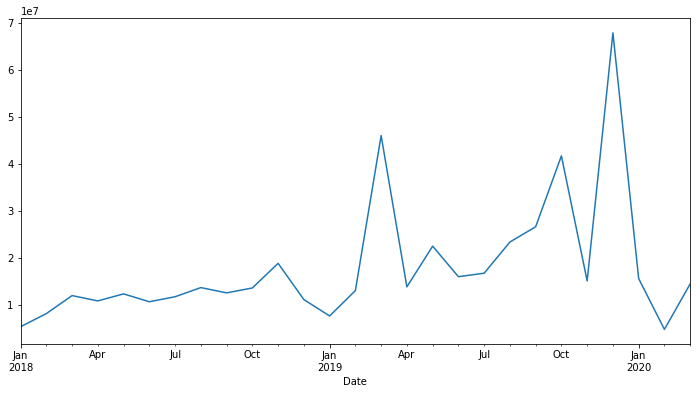

In [57]:
data.plot(figsize=(12,6))

In [29]:
data_ma = data.rolling(window=7).mean()

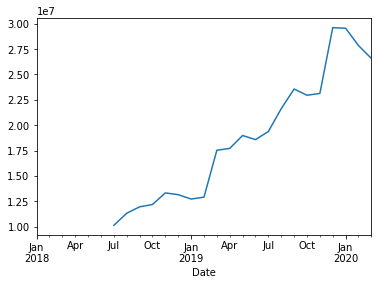

In [30]:
data_ma.plot()

In [31]:
data_base = pd.concat([data,data.shift(1)],axis=1)  # WE CREATED BASE(NAIVE) MODEL TO FORECAST SIMPLLE FORECASTING MODEL 

In [32]:
data_base.columns = ['Actual_sales','Forecast_sales']

In [33]:
data_base

,Actual_sales,Forecast_sales
Date,,
2018-01-01,5345852,NaN
2018-02-01,8138686,5345852.0
2018-03-01,11970514,8138686.0
2018-04-01,10837988,11970514.0
2018-05-01,12333896,10837988.0
2018-06-01,10659118,12333896.0
2018-07-01,11725349,10659118.0
2018-08-01,13671909,11725349.0
2018-09-01,12545930,13671909.0


In [34]:
data_base.dropna(inplace=True)

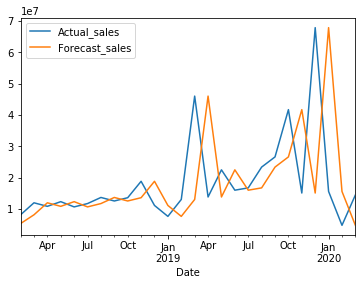

In [35]:
data_base.plot()

In [41]:
##ARIMA

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

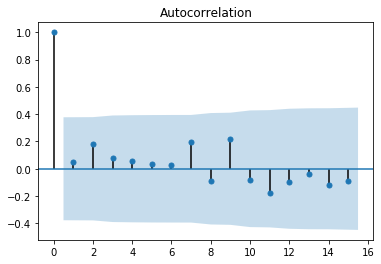

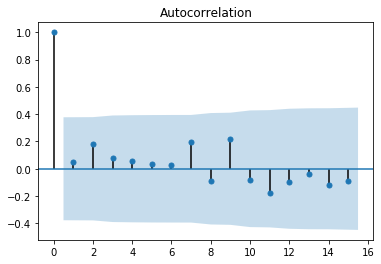

In [59]:
plot_acf(data)

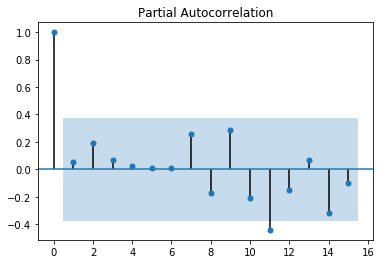

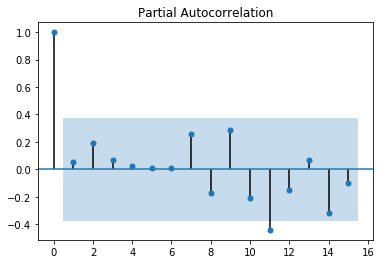

In [60]:
plot_pacf(data)

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
data_model = ARIMA(data,order=(0,1,0))

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:
data_model_fit=data_model.fit()

In [64]:
data_model_fit.aic

948.5379077576022

In [89]:
data_forecast = data_model_fit.forecast(steps=12)[0]

In [90]:
d1=data_forecast

In [91]:
data_forecast

array([14808560.69230769, 15159031.38461538, 15509502.07692308,
       15859972.76923077, 16210443.46153846, 16560914.15384615,
       16911384.84615384, 17261855.53846154, 17612326.23076923,
       17962796.92307692, 18313267.61538461, 18663738.3076923 ])

In [92]:
Data=data.to_frame()

In [93]:
d1=pd.DataFrame(d1)

In [98]:
d1.astype('int')

,0
2020-04-30,14808560
2020-05-31,15159031
2020-06-30,15509502
2020-07-31,15859972
2020-08-31,16210443
2020-09-30,16560914
2020-10-31,16911384
2020-11-30,17261855
2020-12-31,17612326
2021-01-31,17962796


In [95]:
rng = pd.date_range(start="4/1/2020",end="4/1/2021",freq='M')
rng

DatetimeIndex(['2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31'],
              dtype='datetime64[ns]', freq='M')

In [103]:
d1.set_index(rng, inplace=True)
rolling_forecast_Apr2020_Mar2021=d1.astype('int')

In [108]:
rolling_forecast_Apr2020_Mar2021.columns=['Forecast_sales']

In [109]:
rolling_forecast_Apr2020_Mar2021

,Forecast_sales
2020-04-30,14808560
2020-05-31,15159031
2020-06-30,15509502
2020-07-31,15859972
2020-08-31,16210443
2020-09-30,16560914
2020-10-31,16911384
2020-11-30,17261855
2020-12-31,17612326
2021-01-31,17962796
